<a href="https://colab.research.google.com/github/NATTAPAT-LEUNGRUNGSAP/TestRepo/blob/main/Introduction_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

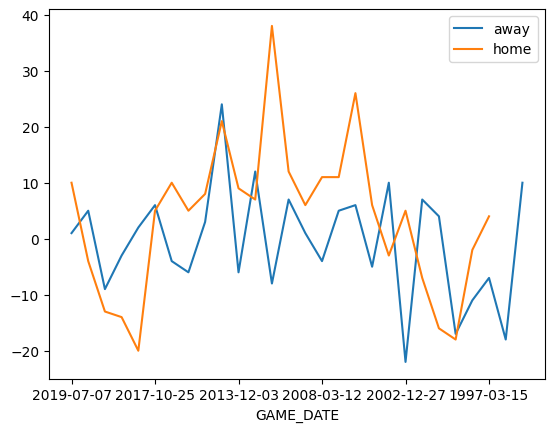

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

dict_={'a':[11,21,31],'b':[12,22,32]}
df = pd.DataFrame(dict_)
type(df)
df.head() #communicate with the API displaying the first few rows of the dataframe.
df.mean() #the API will calculate the mean and return the value

#Rest APIs function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.
!pip install nba_api
from nba_api.stats.static import teams #nba_api.stats.static provide NBA information
import matplotlib.pyplot as plt

#import teams to get the NBA team name
#get_team() list of team name
#get_players() list of player

def one_dict(list_dict):
  keys=list_dict[0].keys() #ดึง keys จาก dictionary แรกเช่น 'name','team'
  out_dict={key:[] for key in keys}  #สร้างdictionary เปล่าที่มี keys เหมือนของเดิม แต่มีค่าเป็น list ว่าง {'name':[],'team':[]}
  for dict_ in list_dict:            #วนลูปผ่านทุก dictionary ในรายการ
    for key, value in dict_.items(): #วนลูปผ่าน key-value ของแต่ละ dictionary
      out_dict[key].append(value)    #นำค่ามาเติมลงใน list ที่มีอยู่ใน out_dict
  return out_dict

nba_teams = teams.get_teams() #ดึงข้อมูลทีม NBA ทั้งหมดในรูปแบบ list of dictionaries ผ่าน .get_teams()
nba_teams[0:3]                #ยกตัวอย่างมา 3 อันจาก index 0 ถึง 2

dict_nba_team = one_dict(nba_teams)     #ใช้ฟังชั่น one_dict เพื่อแปลงข้อมูลให้เป็น dictionary แบบรวม โดยจัด key เป็น column
df_teams = pd.DataFrame(dict_nba_team)  #สร้างDataFrame จาก dictionary ที่รวมแล้ว
df_teams.head()                         #แสดง 5 แถวแรกของตารางทีม NBA

df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors

id_warriors = df_warriors[['id']].values[0][0] #df_warriors[['id']] ต้องการ DataFrame 1 คอลัมน์ที่มีเฉพาะคอลัมน์ 'id'
id_warriors                                    #แปลง DataFrame เป็น NmPy array ดึงข้อมูลจากแถวที่ 0 คอลัมน์ที่ 0

#The function "League Game Finder" will make an API call, it's in the module stats.endpoints
from nba_api.stats.endpoints import leaguegamefinder #เรียกใช้คลาส LeagueGameFinder จาก nba_api สำหรับดึงข้อมูลเกม NBA
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors) #สร้าง gamefinder โดยใส่ team_id_nullable = id_warriors (เช่น1610612744)
gamefinder.get_json()                                #ดูข้อมูลดิบที่ได้มาในรูปแบบ JSON
games = gamefinder.get_data_frames()[0]              #ดึงข้อมูลที่แปลงเป็น DataFrame มาเก็บไว้ในตัวแปร games และจะคืนเป็น list ของ DataFrames และ [0]คือเอาอันแรก
games.head()                                         #แสดงข้อมูล 5 แถวแรก

import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
  response = requests.get(url)
  if response.status_code == 200:
    with open(filename, "wb") as f:
      f.write(response.content)

download(filename, "Golden_State.pkl")

file_name = "Golden_State.pkl"
games = pd.read_pickle(filename)
games.head()

games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_away = games[games['MATCHUP']=='GSW @ TOR']
games_home['PLUS_MINUS'].mean()
games_away['PLUS_MINUS'].mean()

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()


In [31]:
games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_home

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
3        22019  1610612744               GSW  Golden State Warriors   
8        42018  1610612744               GSW  Golden State Warriors   
10       42018  1610612744               GSW  Golden State Warriors   
11       42018  1610612744               GSW  Golden State Warriors   
83       22018  1610612744               GSW  Golden State Warriors   
223      22017  1610612744               GSW  Golden State Warriors   
304      22016  1610612744               GSW  Golden State Warriors   
444      22015  1610612744               GSW  Golden State Warriors   
462      12015  1610612744               GSW  Golden State Warriors   
541      22014  1610612744               GSW  Golden State Warriors   
655      22013  1610612744               GSW  Golden State Warriors   
721      22012  1610612744               GSW  Golden State Warriors   
872      22010  1610612744               GSW  Golden State Warriors   
975      22009  1610612744               GSW  Golden State Warriors   
1102     22008  1610612744               GSW  Golden State Warriors   
1166     22007  1610612744               GSW  Golden State Warriors   
1325     22006  1610612744               GSW  Golden State Warriors   
1407     22005  1610612744               GSW  Golden State Warriors   
1482     22004  1610612744               GSW  Golden State Warriors   
1547     22003  1610612744               GSW  Golden State Warriors   
1650     22002  1610612744               GSW  Golden State Warriors   
1751     22001  1610612744               GSW  Golden State Warriors   
1822     22000  1610612744               GSW  Golden State Warriors   
1912     21999  1610612744               GSW  Golden State Warriors   
1992     21997  1610612744               GSW  Golden State Warriors   
2074     21996  1610612744               GSW  Golden State Warriors   

         GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  \
3     1521900020  2019-07-07  GSW vs. TOR  W  201   80  ...   0.923   6.0   
8     0041800406  2019-06-13  GSW vs. TOR  L  240  110  ...   0.700  11.0   
10    0041800404  2019-06-07  GSW vs. TOR  L  241   92  ...   0.667   8.0   
11    0041800403  2019-06-05  GSW vs. TOR  L  241  109  ...   0.833  13.0   
83    0021800415  2018-12-12  GSW vs. TOR  L  239   93  ...   0.692   5.0   
223   0021700063  2017-10-25  GSW vs. TOR  W  241  117  ...   0.864   6.0   
304   0021600485  2016-12-28  GSW vs. TOR  W  240  121  ...   0.833   9.0   
444   0021500164  2015-11-17  GSW vs. TOR  W  239  115  ...   0.667   9.0   
462   0011500009  2015-10-05  GSW vs. TOR  W  240   95  ...   0.750   4.0   
541   0021400493  2015-01-02  GSW vs. TOR  W  240  126  ...   0.800  14.0   
655   0021300268  2013-12-03  GSW vs. TOR  W  239  112  ...   0.800   9.0   
721   0021200895  2013-03-04  GSW vs. TOR  W  240  125  ...   0.821   6.0   
872   0021001079  2011-03-25  GSW vs. TOR  W  239  138  ...   0.813   7.0   
975   0020900982  2010-03-13  GSW vs. TOR  W  239  124  ...   0.818  18.0   
1102  0020800457  2008-12-29  GSW vs. TOR  W  242  117  ...   0.879   6.0   
1166  0020700962  2008-03-12  GSW vs. TOR  W  243  117  ...   0.778  11.0   
1325  0020600107  2006-11-14  GSW vs. TOR  W  240  110  ...   0.652  14.0   
1407  0020500189  2005-11-26  GSW vs. TOR  W  240  117  ...   0.750  10.0   
1482  0020400416  2004-12-29  GSW vs. TOR  W  240  111  ...   0.857   9.0   
1547  0020300735  2004-02-08  GSW vs. TOR  L  265   81  ...   0.621   8.0   
1650  0020200416  2002-12-27  GSW vs. TOR  W  239  101  ...   0.939  19.0   
1751  0020100115  2001-11-14  GSW vs. TOR  L  240   82  ...   0.667  20.0   
1822  0020000281  2000-12-08  GSW vs. TOR  L  239   92  ...   0.630  18.0   
1912  0029900193  1999-11-27  GSW vs. TOR  L  240   88  ...   0.706  20.0   
1992  0029700925  1998-03-15  GSW vs. TOR  L  264   98  ...   0.583  26.0   
2074  0029600927  1997-03-15  GSW vs. TOR  W  241  106  ...   0.708  16.0   

      D

In [33]:
games_away = games[games['MATCHUP']=='GSW @ TOR']
games_away

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
9        42018  1610612744               GSW  Golden State Warriors   
12       42018  1610612744               GSW  Golden State Warriors   
13       42018  1610612744               GSW  Golden State Warriors   
89       22018  1610612744               GSW  Golden State Warriors   
184      22017  1610612744               GSW  Golden State Warriors   
326      22016  1610612744               GSW  Golden State Warriors   
343      12016  1610612744               GSW  Golden State Warriors   
345      22016  1610612744               GSW  Golden State Warriors   
435      22015  1610612744               GSW  Golden State Warriors   
516      22014  1610612744               GSW  Golden State Warriors   
614      22013  1610612744               GSW  Golden State Warriors   
738      22012  1610612744               GSW  Golden State Warriors   
827      22011  1610612744               GSW  Golden State Warriors   
938      22010  1610612744               GSW  Golden State Warriors   
964      22009  1610612744               GSW  Golden State Warriors   
1133     22008  1610612744               GSW  Golden State Warriors   
1141     22008  1610612744               GSW  Golden State Warriors   
1221     22007  1610612744               GSW  Golden State Warriors   
1308     22006  1610612744               GSW  Golden State Warriors   
1399     22005  1610612744               GSW  Golden State Warriors   
1477     22004  1610612744               GSW  Golden State Warriors   
1522     22003  1610612744               GSW  Golden State Warriors   
1627     22002  1610612744               GSW  Golden State Warriors   
1755     22001  1610612744               GSW  Golden State Warriors   
1789     22000  1610612744               GSW  Golden State Warriors   
1861     21999  1610612744               GSW  Golden State Warriors   
2053     21997  1610612744               GSW  Golden State Warriors   
2117     21996  1610612744               GSW  Golden State Warriors   

         GAME_ID   GAME_DATE    MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  \
9     0041800405  2019-06-10  GSW @ TOR  W  240  106  ...   0.714   6.0  31.0   
12    0041800402  2019-06-02  GSW @ TOR  W  240  109  ...   0.870   6.0  36.0   
13    0041800401  2019-05-30  GSW @ TOR  L  239  109  ...   0.935   9.0  29.0   
89    0021800316  2018-11-29  GSW @ TOR  L  265  128  ...   0.850  17.0  29.0   
184   0021700631  2018-01-13  GSW @ TOR  W  239  127  ...   0.857   3.0  27.0   
326   0021600165  2016-11-16  GSW @ TOR  W  240  127  ...   0.929   7.0  28.0   
343   0011600001  2016-10-01  GSW @ TOR  L  241   93  ...   0.625   9.0  33.0   
345   1521600051  2016-07-14  GSW @ TOR  L  198   69  ...   0.750  14.0  29.0   
435   0021500290  2015-12-05  GSW @ TOR  W  239  112  ...   0.722   8.0  35.0   
516   0021400861  2015-02-27  GSW @ TOR  W  240  113  ...   0.842   9.0  38.0   
614   0021300884  2014-03-02  GSW @ TOR  L  240   98  ...   0.800  16.0  25.0   
738   0021200659  2013-01-28  GSW @ TOR  W  240  114  ...   0.800  13.0  36.0   
827   0021100548  2012-03-04  GSW @ TOR  L  241   75  ...   0.684  10.0  31.0   
938   0021000097  2010-11-08  GSW @ TOR  W  239  109  ...   0.813  11.0  31.0   
964   0020901145  2010-04-04  GSW @ TOR  W  240  113  ...   0.720   7.0  33.0   
1133  0020800020  2008-10-31  GSW @ TOR  L  266  108  ...   0.684  17.0  29.0   
1141  1520800043  2008-07-19  GSW @ TOR  W  201   95  ...   0.781  19.0  19.0   
1221  0020700141  2007-11-18  GSW @ TOR  W  239  106  ...   0.667  12.0  35.0   
1308  0020600351  2006-12-17  GSW @ TOR  L  240  115  ...   0.880   8.0  30.0   
1399  0020500322  2005-12-16  GSW @ TOR  W  240  108  ...   0.652   6.0  27.0   
1477  0020400487  2005-01-09  GSW @ TOR  L  240   87  ...   0.917  10.0  29.0   
1522  0020301081  2004-03-31  GSW @ TOR  W  240   85  ...   0.714  10.0  35.0   
1627  0020200732  2003-02-14  GSW @ TOR  W  264  118  ...   0.818  16.0  37.0   
1